In [23]:

import pandas as pd
def get_df():
    df = pd.read_excel(fr"C:\Users\halik\OneDrive\Dokumenty\GitHub\predikce-nabidky\funcni data set - Copy.xlsx")
    df = df.drop(df.index[:13])
    df = df.drop(df.index[-1:])
    df['datetime'] = pd.date_range(start='2016-03-01', periods=85, freq='MS')
    return df
get_df()

,datum,Unnamed: 1,repo-1,repo-2,repo-3,repo-4,repo-5,repo-6,repo-7,repo-8,...,doba-5,doba-6,doba-7,doba-8,doba-9,doba-10,doba-11,doba-12,index,datetime
13,201603,5,5,5,5,5,5,5,5,5,...,69.0,70.0,64.0,67.0,70.0,42.0,76.0,77.0,13,2016-03-01
14,201604,5,5,5,5,5,5,5,5,5,...,66.0,69.0,70.0,64.0,67.0,70.0,42.0,76.0,14,2016-04-01
15,201605,5,5,5,5,5,5,5,5,5,...,77.0,66.0,69.0,70.0,64.0,67.0,70.0,42.0,15,2016-05-01
16,201606,5,5,5,5,5,5,5,5,5,...,74.0,77.0,66.0,69.0,70.0,64.0,67.0,70.0,16,2016-06-01
17,201607,5,5,5,5,5,5,5,5,5,...,73.0,74.0,77.0,66.0,69.0,70.0,64.0,67.0,17,2016-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,202211,700,700,700,700,700,700,575,500,450,...,66.0,60.0,62.0,62.0,67.0,76.0,66.0,61.0,93,2022-11-01
94,202212,700,700,700,700,700,700,575,500,450,...,68.0,66.0,60.0,62.0,62.0,67.0,76.0,66.0,94,2022-12-01
95,202301,700,700,700,700,700,700,575,500,450,...,67.0,68.0,66.0,60.0,62.0,62.0,67.0,76.0,95,2023-01-01
96,202302,700,700,700,700,700,700,575,500,450,...,71.0,67.0,68.0,66.0,60.0,62.0,62.0,67.0,96,2023-02-01


detrendování dat

In [24]:
df = get_df()
df_detrend = df.copy()
parametry = ['aktivni-1', 'nove-1', 'zbytek-1']
for parametr in parametry:
    df_detrend[parametr] = pd.Series((df[parametr]))

deseasonalizování dat

In [25]:
import statsmodels.api as sm
df_deseasoned = df_detrend.copy()
for parametr in parametry:
    decomp = sm.tsa.seasonal_decompose(df_detrend[parametr], period=12, model='additive')
    df_deseasoned[parametr] = df_detrend[parametr] - decomp.seasonal.values



grafy

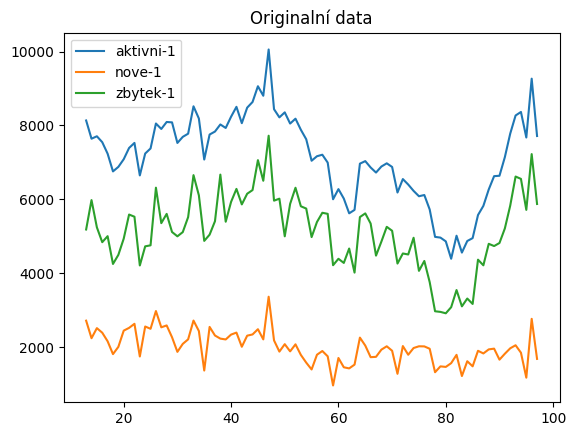

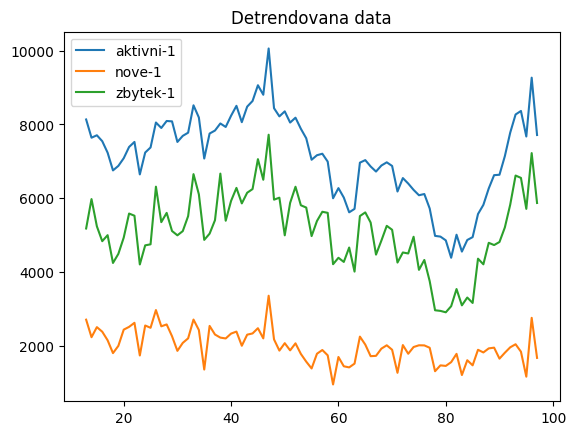

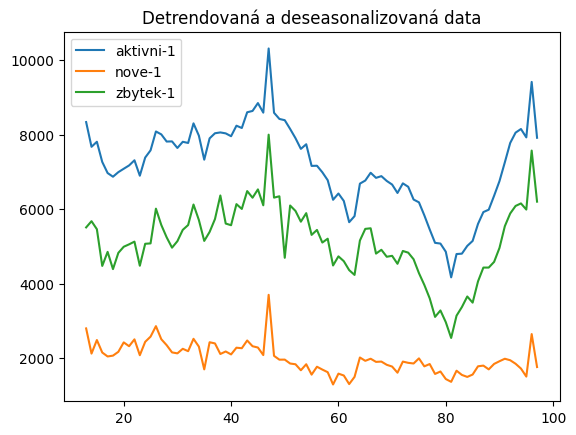

In [26]:
from matplotlib import pyplot as plt
#>> originalni data
plt.plot(df.index, df['aktivni-1'], label='aktivni-1')
plt.plot(df.index, df['nove-1'], label='nove-1')
plt.plot(df.index, df['zbytek-1'], label='zbytek-1')
plt.legend()
plt.title('Originalní data')
plt.show()
#>> detrendovana data
plt.plot(df.index, df_detrend['aktivni-1'], label='aktivni-1')
plt.plot(df.index, df_detrend['nove-1'], label='nove-1')
plt.plot(df.index, df_detrend['zbytek-1'], label='zbytek-1')
plt.legend()
plt.title('Detrendovana data')
plt.show()
#>> detrendovana a deseasonalizovana data
plt.plot(df.index, df_deseasoned['aktivni-1'], label='aktivni-1')
plt.plot(df.index, df_deseasoned['nove-1'], label='nove-1')
plt.plot(df.index, df_deseasoned['zbytek-1'], label='zbytek-1')
plt.legend()
plt.title('Detrendovaná a deseasonalizovaná data')
plt.show()

OLS model

In [62]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report, r2_score

import statsmodels.api as sm
from statsmodels.tools import add_constant

#*defiunovani dat
#@parametry
parametry = ['aktivni-1', 'nove-1', 'zbytek-1']
X = df_deseasoned[parametry]
y = df_deseasoned['aktivni']

#*Add a constant term to the training and testing data
X = add_constant(X)

#* training dataframe bez randomizace
X_train = X.drop(X.index[-12:])
y_train = y.drop(y.index[-12:])
#* testing dataframe bez randomizace
X_test = X.drop(X.index[:-12])
X_test = X_test.drop(X_test.index[-1:])
y_test = y.drop(y.index[:-12])
y_test = y_test.drop(y_test.index[-1:])


#* fitnuti ols_model modelu na train datech
ols_model = sm.OLS(y_train, X_train).fit(cov_type='HC0')

#*predikce na train datech
y_pred_train = ols_model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

#*predikce na test setu
y_pred_test = ols_model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

#>> output
print(f"Mean absolute error (train set): {mae_train:.2f}")
print(f"Mean squared error (train set): {mse_train:.2f}")
print(f"Root mean squared error (train set): {rmse_train:.2f}")
print(f"r2 (train set): {r2_train:.2f}")
print("\n")
print(f"Mean absolute error (test set): {mae_test:.2f}")
print(f"Mean squared error (test set): {mse_test:.2f}")
print(f"Root mean squared error (test set): {rmse_test:.2f}")
print(f"r2 (test set): {r2_test:.2f}")
print("\n")
print(ols_model.summary())

Mean absolute error (train set): 311.87
Mean squared error (train set): 186266.36
Root mean squared error (train set): 431.59
r2 (train set): 0.87


Mean absolute error (test set): 604.17
Mean squared error (test set): 481466.73
Root mean squared error (test set): 693.88
r2 (test set): 0.50


                            OLS Regression Results                            
Dep. Variable:                aktivni   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     101.6
Date:                Thu, 04 May 2023   Prob (F-statistic):           2.92e-25
Time:                        19:20:06   Log-Likelihood:                -546.51
No. Observations:                  73   AIC:                             1101.
Df Residuals:                      69   BIC:                             1110.
Df Model:                           3                                     

predikce

In [57]:
X_new = X.drop(X.index[:-1])
y_pred = ols_model.predict(X_new)
predikce = y_pred
print(f"""
Model:      {ols_model}
Min:        {int(y_pred-rmse)}
Predikce:   {int(y_pred)}
Max:        {int(y_pred+rmse)}
Rmse:       {int(rmse)}
""")


Model:      <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002367D280A60>
Min:        7236
Predikce:   7928
Max:        8620
Rmse:       691



graf predikce

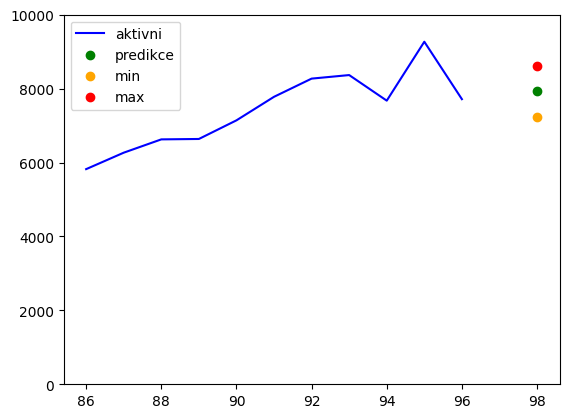

In [58]:
#* realita
plt.plot(y_test.index, y_test.values,label="aktivni",color="blue")
#* predikce
plt.scatter(df_new.index+1, y_pred.values, label='predikce', color="green")
plt.scatter(df_new.index+1, y_pred.values-rmse, label='min', color="orange")
plt.scatter(df_new.index+1, y_pred.values+rmse, label='max', color="red")
plt.ylim(0,10000)
plt.legend()
plt.show()

grafy vztahů

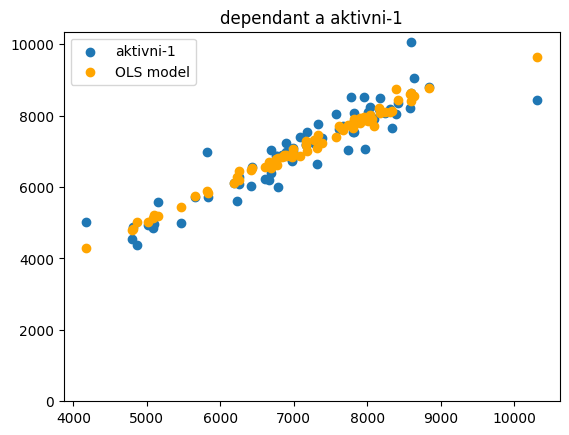

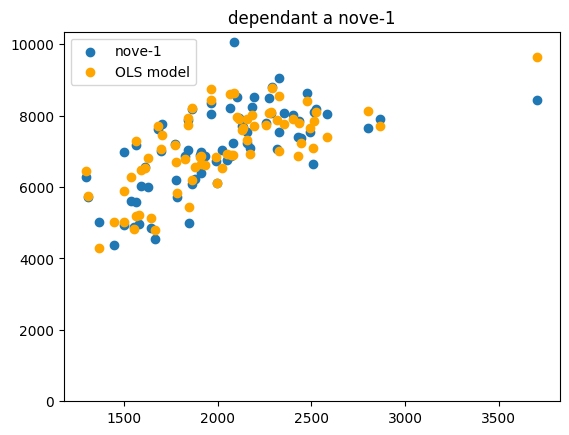

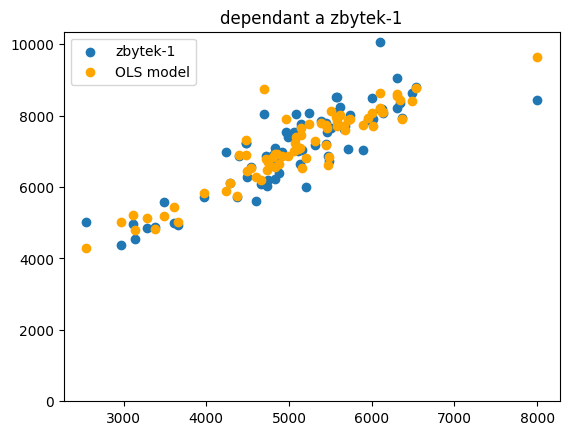

In [59]:
parametry = ['aktivni-1', 'nove-1', 'zbytek-1']
for parametr in parametry:
    plt.scatter( X_train[parametr], y_train, label=parametr)
    plt.scatter(X_train[parametr], y_pred_train, color="orange", label="OLS model")
    plt.ylim(0)
    plt.legend()
    plt.title(f'dependant a {parametr}')
    plt.show()

Graf model vs realita

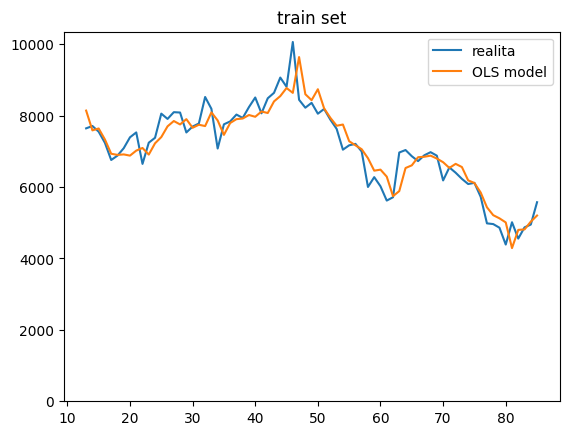

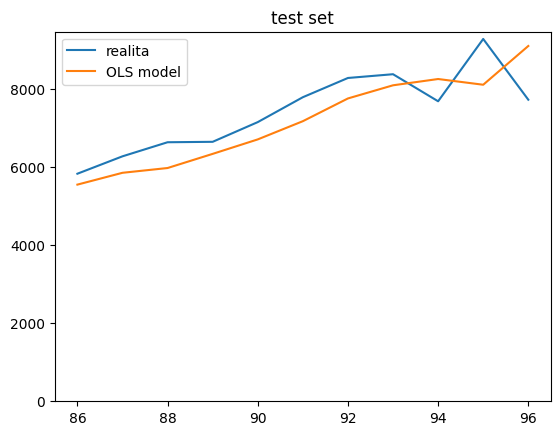

In [60]:
plt.plot(X_train.index, y_train, label='realita')
plt.plot(X_train.index, y_pred_train, label='OLS model')
plt.title('train set')
plt.legend()
plt.ylim(0)
plt.show()

plt.plot(X_test.index, y_test, label='realita')
plt.plot(X_test.index, y_pred_test, label='OLS model')
plt.title('test set')
plt.legend()
plt.ylim(0)
plt.show()
